In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('customer_acquisition_data.csv')
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [43]:
df.shape

(800, 5)

In [44]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [46]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


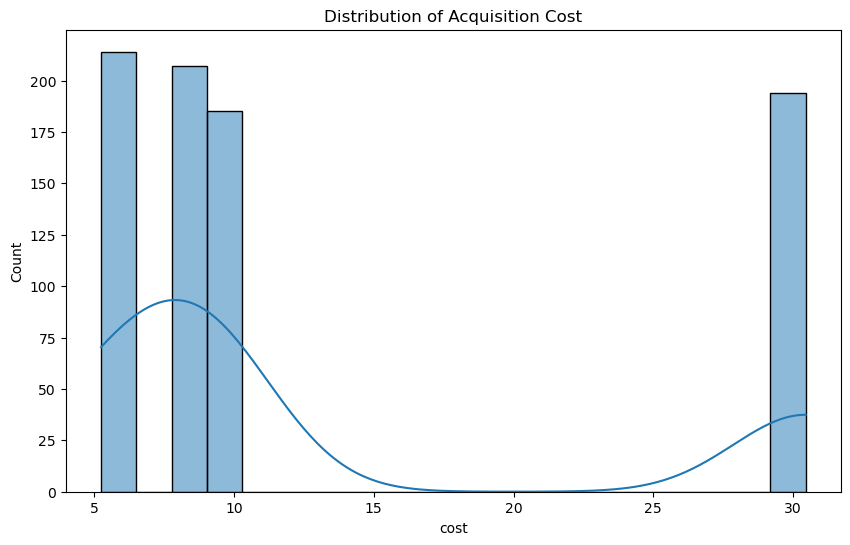

In [47]:
plt.figure(figsize=(10,6))

sns.histplot(data = df,
             x = df['cost'],
             bins = 20,
             kde= True
             )
plt.title('Distribution of Acquisition Cost')
plt.show()

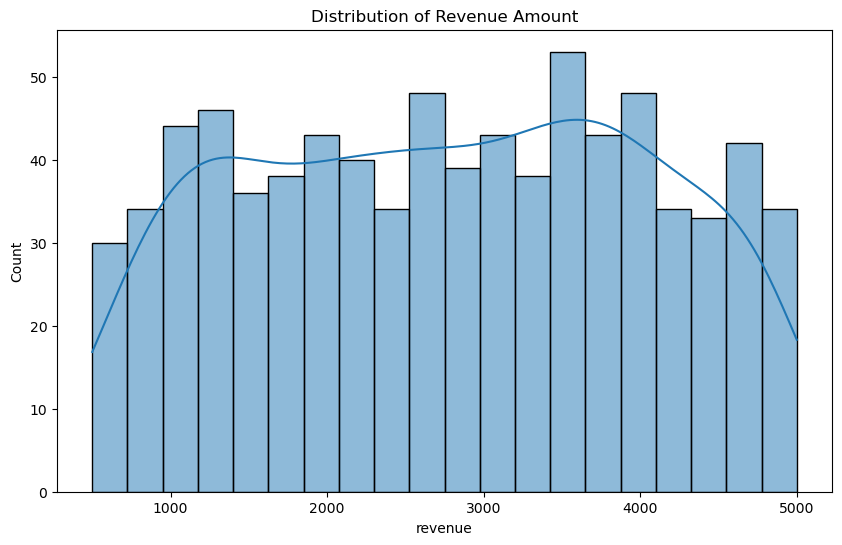

In [48]:
plt.figure(figsize=(10,6))

sns.histplot(data = df,
             x = df['revenue'],
             bins = 20,
             kde= True)
plt.title('Distribution of Revenue Amount')
plt.show()

In [49]:
channel_cost = df.groupby('channel')['cost'].mean().reset_index()
channel_cost.head()

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


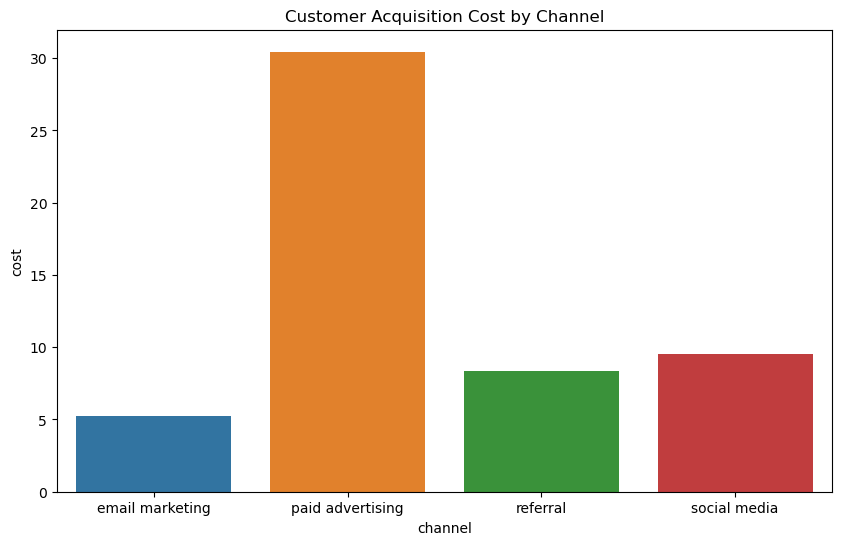

In [50]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_cost,
            x = 'channel',
            y = 'cost')

plt.title('Customer Acquisition Cost by Channel')
plt.show()

In [51]:
channel_conversion_rate = df.groupby('channel')['conversion_rate'].mean().reset_index()
channel_conversion_rate.head()

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


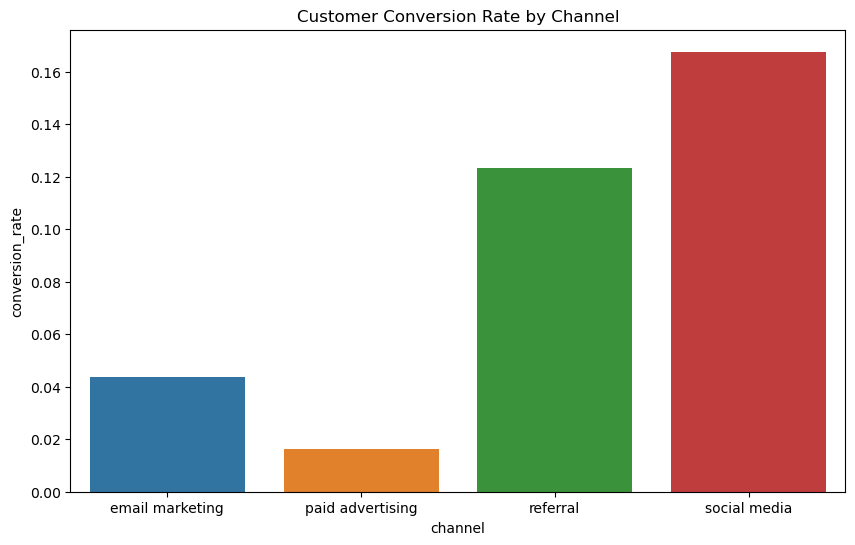

In [52]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_conversion_rate,
            x = 'channel',
            y = 'conversion_rate')

plt.title('Customer Conversion Rate by Channel')
plt.show()

In [53]:
channel_revenue = df.groupby('channel')['revenue'].sum().reset_index()
channel_revenue.head()

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


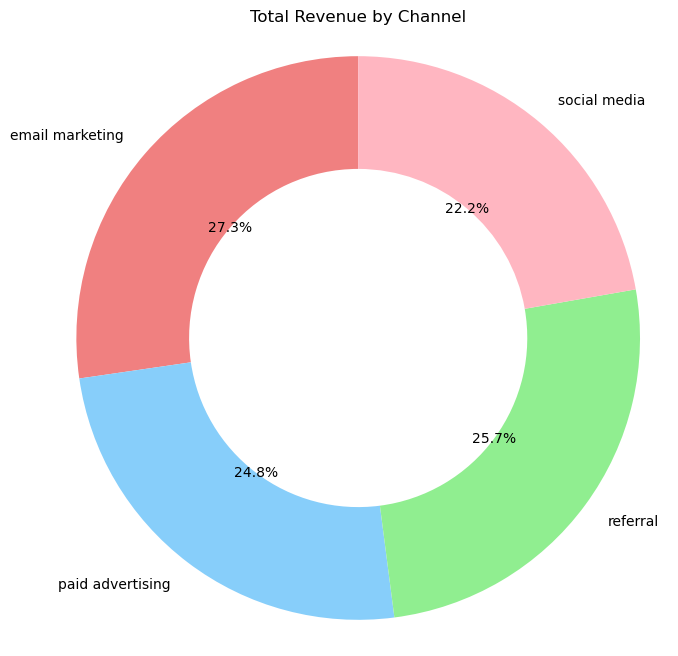

In [54]:
values = channel_revenue['revenue']
labels = channel_revenue['channel']

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
plt.figure(figsize=(8,8))
plt.pie(values, labels= labels, autopct= '%1.1f%%', startangle= 90, 
        colors= colors, wedgeprops= dict(width = 0.4))

plt.title('Total Revenue by Channel')
plt.axis('equal')

plt.show()

In [55]:
df['roi'] = (df['revenue'] - df['cost']) / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


In [56]:
channel_roi = df.groupby('channel')['roi'].mean().reset_index()
channel_roi.head()

,channel,roi
0,email marketing,537.617455
1,paid advertising,91.832615
2,referral,329.691213
3,social media,277.962290


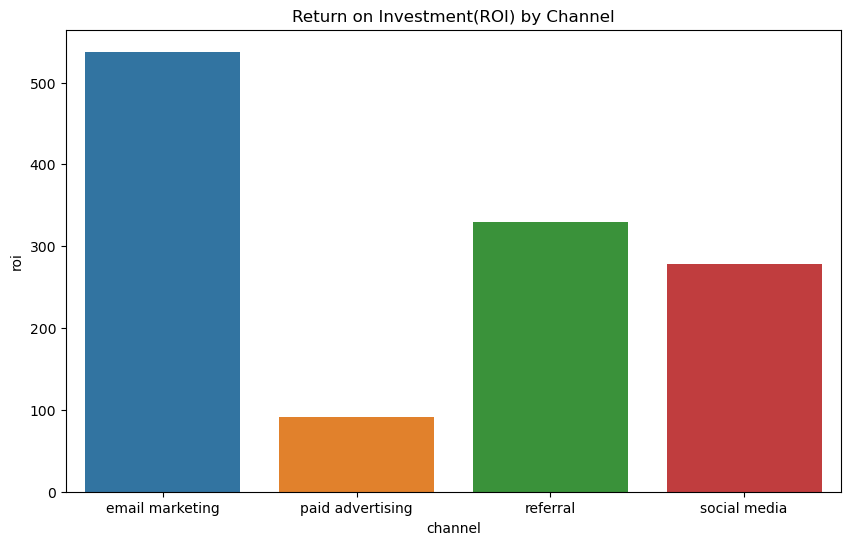

In [62]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_roi,
            x = 'channel',
            y = 'roi')

plt.title('Return on Investment(ROI) by Channel')
plt.show()

In [60]:
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


In [61]:
channel_cltv = df.groupby('channel')['cltv'].mean().reset_index()
channel_cltv.head()

,channel,cltv
0,email marketing,23.559595
1,paid advertising,1.500682
2,referral,40.599817
3,social media,46.584325


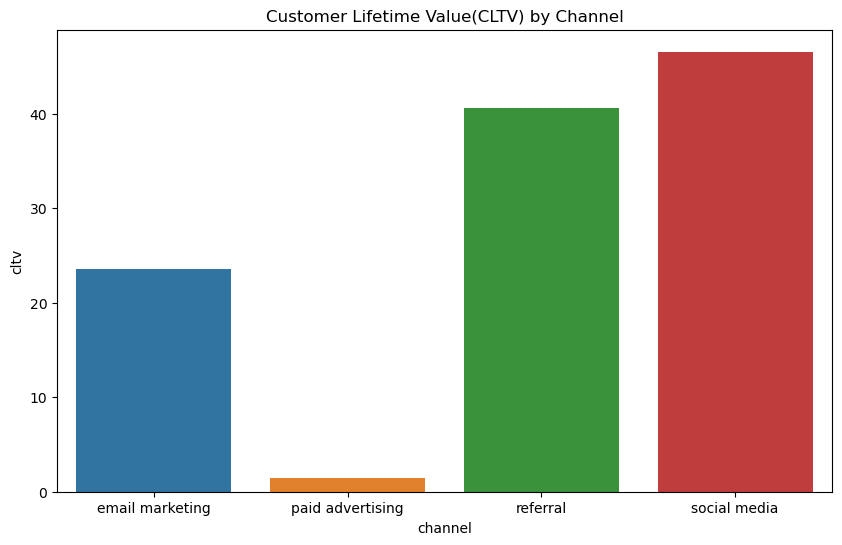

In [63]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_cltv,
            x = 'channel',
            y = 'cltv')

plt.title('Customer Lifetime Value(CLTV) by Channel')
plt.show()

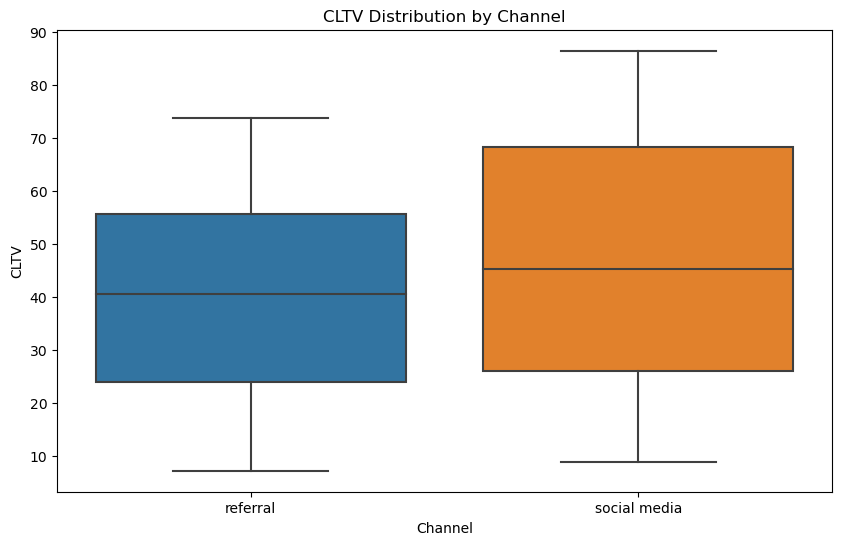

In [64]:
subset = df.loc[df['channel'].isin(['social media', 'referral'])]

plt.figure(figsize=(10,6))
sns.boxplot(data = subset,
            x = 'channel',
            y = 'cltv'
            )

plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()